In [52]:
import pandas as pd

In [53]:
import numpy as np

In [54]:
import matplotlib.pyplot as plt

In [55]:
import seaborn as sns

In [56]:
sns.set()

In [57]:
data=pd.read_csv("911.csv")

In [144]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,year,month,day,hour,emergency_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday,14,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday,16,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday,16,DIZZINESS


In [59]:
data.shape

(423909, 9)

In [60]:
data.shape[1]

9

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [62]:
def call_separator(x):
    x=x.split(":")
    return x[0]


In [63]:
data["call_type"]=data["title"].apply(call_separator)

In [64]:
data.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire


In [65]:
data["call_type"].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [66]:
data["call_type"].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: call_type, dtype: int64

In [67]:
data["timeStamp"]=pd.to_datetime(data["timeStamp"],infer_datetime_format=True)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 10 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null datetime64[ns]
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
call_type    423909 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 32.3+ MB


In [69]:
import datetime as dt

In [70]:
data["year"]=data["timeStamp"].dt.year

In [71]:
data["month"]=data["timeStamp"].dt.month_name()

In [72]:
data["day"]=data["timeStamp"].dt.day_name()

In [73]:
data["hour"]=data["timeStamp"].dt.hour

In [74]:
data.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,year,month,day,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17


In [75]:
def emergency_type_separator(x):
    x=x.split(":")
    return x[1]


In [77]:
data["emergency_type"]=data["title"].apply(emergency_type_separator)

In [78]:
data.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,year,month,day,hour,emergency_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17,DIABETIC EMERGENCY


In [79]:
data["call_type"].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: call_type, dtype: int64

In [80]:
from decimal import Decimal

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

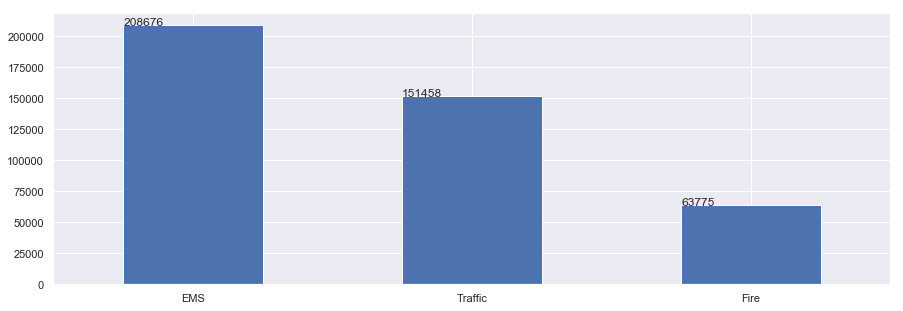

In [81]:
call_type=data["call_type"].value_counts()
plt.figure(figsize=(15,5))
var=call_type.plot.bar()
for i in var.patches:
    var.annotate(Decimal(str(i.get_height())), (i.get_x(), i.get_height()))
plt.xticks(rotation=0)

In [82]:
calls_data=data.groupby(["month","call_type"])["call_type"].count()

In [83]:
calls_data

month      call_type
April      EMS          17255
           Fire          4983
           Traffic      11345
August     EMS          17965
           Fire          5717
           Traffic      12290
December   EMS          16131
           Fire          4717
           Traffic      12171
February   EMS          16587
           Fire          4894
           Traffic      11347
January    EMS          18403
           Fire          5637
           Traffic      13784
July       EMS          18096
           Fire          5725
           Traffic      12584
June       EMS          17644
           Fire          5618
           Traffic      12909
March      EMS          17883
           Fire          5752
           Traffic      14031
May        EMS          17819
           Fire          5168
           Traffic      12657
November   EMS          14669
           Fire          4456
           Traffic      12518
October    EMS          18565
           Fire          5636
           Traffic 

In [112]:
calls_data_percentage = calls_data.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))

In [113]:
calls_data_percentage

month      call_type
April      EMS          51.0
           Fire         15.0
           Traffic      34.0
August     EMS          50.0
           Fire         16.0
           Traffic      34.0
December   EMS          49.0
           Fire         14.0
           Traffic      37.0
February   EMS          51.0
           Fire         15.0
           Traffic      35.0
January    EMS          49.0
           Fire         15.0
           Traffic      36.0
July       EMS          50.0
           Fire         16.0
           Traffic      35.0
June       EMS          49.0
           Fire         16.0
           Traffic      36.0
March      EMS          47.0
           Fire         15.0
           Traffic      37.0
May        EMS          50.0
           Fire         14.0
           Traffic      36.0
November   EMS          46.0
           Fire         14.0
           Traffic      40.0
October    EMS          49.0
           Fire         15.0
           Traffic      36.0
September  EMS        

In [114]:
font={
    "size":"30",
    "weight":"bold"
}

In [115]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [116]:
calls_data_percentage=calls_data_percentage.reindex(month,level=0)

In [118]:
calls_data_percentage=calls_data_percentage.reindex(["EMS","Fire","Traffic"],level=1)

In [119]:
calls_data_percentage.head()

month     call_type
January   EMS          49.0
          Fire         15.0
          Traffic      36.0
February  EMS          51.0
          Fire         15.0
Name: call_type, dtype: float64

In [121]:
srn.set(rc={"figure.figsize":(12,8)})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

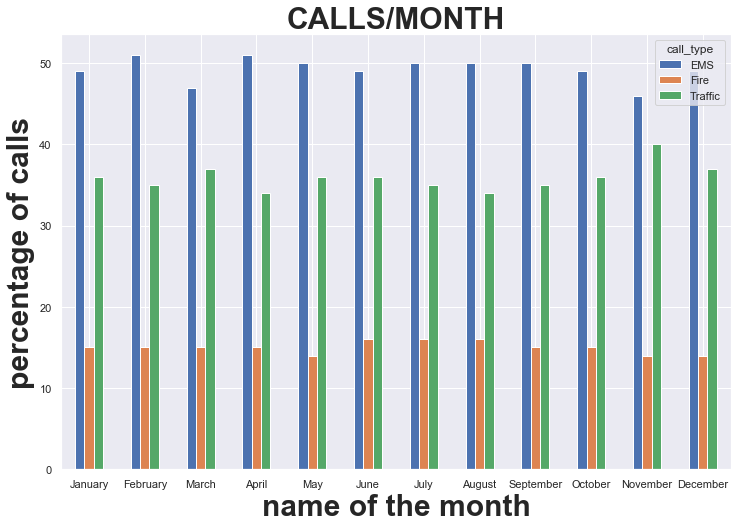

In [125]:
calls_data_percentage.unstack().plot(kind="bar")
plt.xlabel("name of the month",fontdict=font)
plt.ylabel("percentage of calls",fontdict=font)
plt.title("CALLS/MONTH",fontdict=font)
plt.xticks(rotation=0)

In [129]:
hours_data=data.groupby(["hour","call_type"])["call_type"].count()

In [130]:
hours_data.head()

hour  call_type
0     EMS          5263
      Fire         1341
      Traffic      2046
1     EMS          4711
      Fire         1104
Name: call_type, dtype: int64

In [136]:
hours_data_percentage=hours_data.groupby(level=0).apply(lambda x : round(100*x/float(x.sum())))

In [137]:
hours_data_percentage.head()

hour  call_type
0     EMS          61.0
      Fire         16.0
      Traffic      24.0
1     EMS          64.0
      Fire         15.0
Name: call_type, dtype: float64

In [138]:
hours_data_percentage=hours_data_percentage.reindex(["EMS","Fire","Traffic"],level=1)

In [139]:
srn.set(rc={"figure.figsize":(12,8)})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

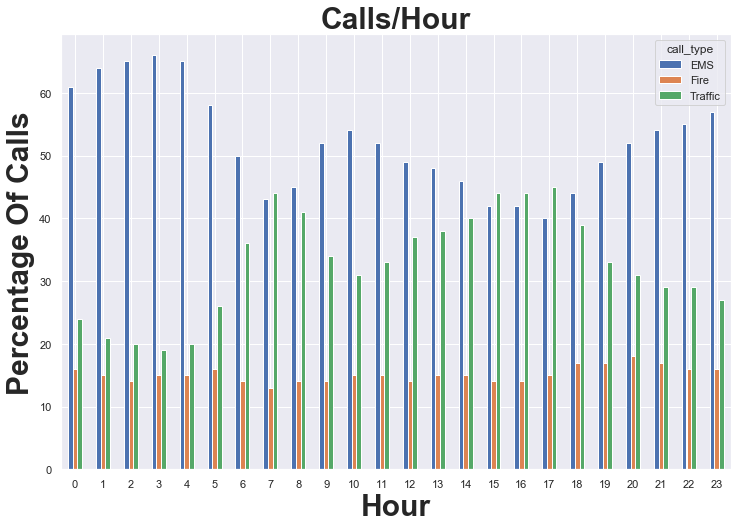

In [141]:
hours_data_percentage.unstack().plot(kind="bar")
plt.xlabel("Hour",fontdict=font)
plt.ylabel("Percentage Of Calls",fontdict=font)
plt.title("Calls/Hour",fontdict=font)
plt.xticks(rotation=0)